In [2]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [8]:
PI = 3.1415926
e = 2.71828

def f(x):
    f = (e**(-1*x))/(1+(1-x)**2)
    return f


### Crude Monte Carlo

In [15]:
# Initialize sum
sum = 0
# Iterate function with random inputs for x 10000 times
for i in range(10000):
    x = random.uniform(0,5)
    sum += f(x)
# Take average of output values and multiply by range of random inputs
crude = 5 * float(sum/10000) 
print(str(crude) + ", Wolframs approximation = .696092")

0.6999126569177647, Wolframs approximation = .696092


Text(0.5, 1.0, 'f (x)')

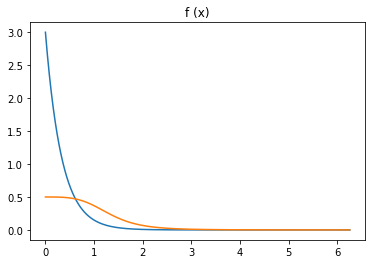

In [30]:
xs = [float(i/50) for i in range(int(50*PI*2))]
ys = [f(x) for x in xs]
gs = [g(x, A, lamda) for x in xs]
plt.plot(xs,gs)
plt.plot(xs,ys)
plt.title("f (x)")

In [29]:
def g(x, A, lamda):
    return A*math.pow(e, -1*lamda*x)

def inverse_G_of_r(r, lamda):
    return (-1*math.log(float(r)))/lamda

def get_IS_variance(lamda, num_samples):
    A = lamda
    int_max = 5
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        x = random.uniform(0, int_max)
        running_total += (f(x)/g(x, A, lamda))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        x = random.uniform(0, int_max)
        running_total += f(x)/g(x, A, lamda)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave

# get variance as a function of lambda by testing many
# different lambdas

test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas):
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(get_IS_variance(lamda, 10000))
    clear_output(wait=True)
    
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal Variance: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

Optimal Lambda: 1.6500000000000001
Optimal Variance: 0.04142234199435768
Error: 0.0020352479454444285


Text(0.5, 1.0, 'f (x)')

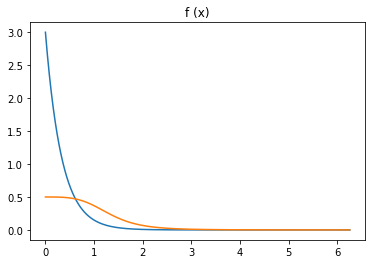

In [31]:
xs = [float(i/50) for i in range(int(50*PI*2))]
ys = [f(x) for x in xs]
gs = [g(x, A, lamda) for x in xs]
plt.plot(xs,gs)
plt.plot(xs,ys)
plt.title("f (x)")